In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [325]:
train=pd.read_csv("../../data/titanic/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [326]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0, 0.5, 'Pclass Count')

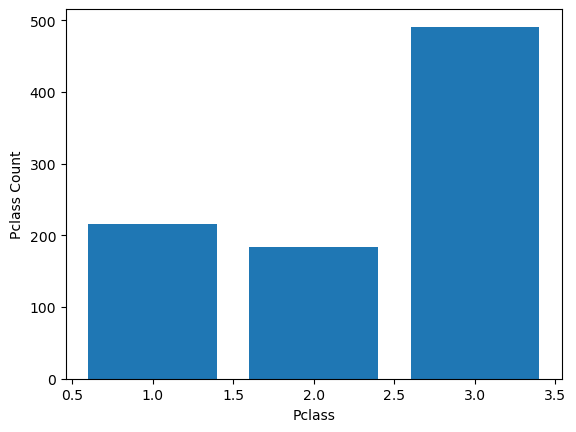

In [327]:
plt.bar(x=train.groupby("Pclass").Survived.count().index, height=train.groupby("Pclass").Survived.count())
plt.xlabel('Pclass')
plt.ylabel('Pclass Count')

In [328]:
train.groupby('Sex').count().Survived

Sex
female    314
male      577
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

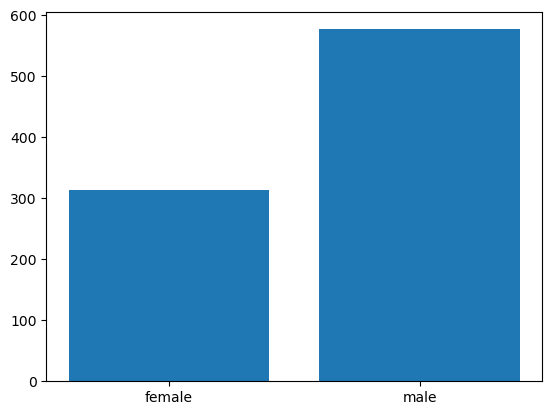

In [329]:

plt.bar(height=train.groupby('Sex').count().Survived,x=train.groupby('Sex').count().Survived.index)

In [330]:
train.groupby('SibSp').count().Survived

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

<BarContainer object of 7 artists>

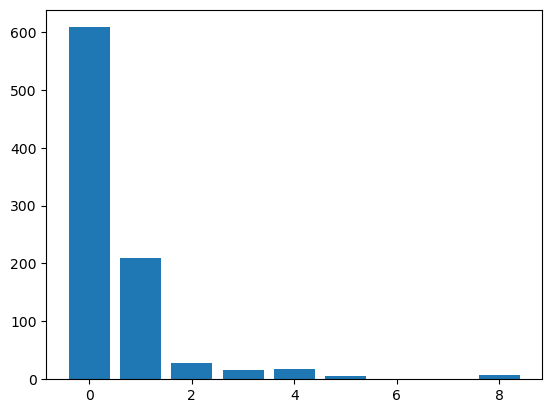

In [331]:
plt.bar(height=train.groupby('SibSp').count().Survived,x=train.groupby('SibSp').count().Survived.index)

In [332]:
train['familysize']=train.SibSp+train.Parch+1

In [333]:
def ho(x):
    y=re.findall(r'Mr|Miss|Mrs|Master',x)
    y=str(y).strip('[]')
    y=y.replace("\'",'')
    return y
train['Title']=train.Name.apply(ho)

In [334]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr


In [335]:
train.loc[train.Title=='','Title']=4
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr


In [336]:
train.loc[train.Title=='Mr','Title']=1
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


In [337]:
train.Title.value_counts()

Title
1           642
Miss        180
Master       40
4            24
Mr, Mr        3
Miss, Mr      2
Name: count, dtype: int64

In [338]:
train.loc[train.Title=='Miss','Title']=2

In [339]:
train.loc[train.Title=='Master','Title']=3
#1은 Mr 2는 Miss 3은 Master 4는 호칭 없음 

In [340]:
train.loc[train.Title=='Mr, Mr','Title']=1

In [341]:
train.loc[train.Title=='Miss, Mr','Title']=2

In [342]:
train.Title.value_counts()

Title
1    645
2    182
3     40
4     24
Name: count, dtype: int64

In [358]:
df=train.groupby('Title').Survived.value_counts().unstack()
df

Survived,0,1
Title,,
1,462,183
2,55,127
3,17,23
4,15,9


In [347]:
import seaborn as sns

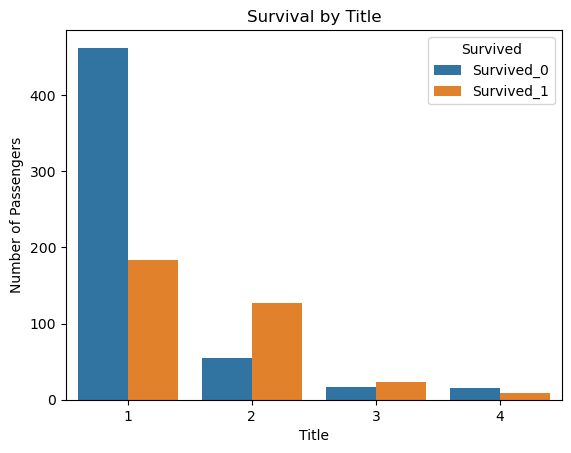

In [363]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 주어진 데이터
data = {
    'Title': [1, 2, 3, 4],
    'Survived_0': [462, 55, 17, 15],
    'Survived_1': [183, 127, 23, 9]
}

# 데이터프레임으로 변환
df = pd.DataFrame(data)

# 데이터프레임을 Seaborn이 요구하는 형식으로 변환
df_long = pd.melt(df, id_vars=['Title'], var_name='Survived', value_name='Count')

# Seaborn을 사용하여 막대 그래프 그리기
sns.barplot(data=df_long, x='Title', y='Count', hue='Survived')

# 그래프 제목 추가
plt.title('Survival by Title')

# x축 레이블 추가
plt.xlabel('Title')

# y축 레이블 추가
plt.ylabel('Number of Passengers')

# 그래프 표시
plt.show()